<a href="https://colab.research.google.com/github/kusalsai/Ayinala_INFO5731_Spring2025/blob/main/INFO5731_Assignment_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [11]:
from collections import defaultdict
import re
import pandas as pd

# Function to preprocess text: Tokenize and clean
def preprocess_text(text):
    # Convert to lowercase and extract words only
    text = text.lower()
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Function to create N-grams (for any N)
def n_grams(tokens, n=2):
    return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

# Function to extract simple noun phrases (Placeholder approach)
# To improve, use a proper POS tagging system like SpaCy or NLTK.
def extract_noun_phrases(tokens):
    # Placeholder: Extracting words as noun phrases that are longer than 3 characters
    noun_phrases = [token for token in tokens if len(token) > 3]
    return noun_phrases

# Load dataset from CSV file
dataset = pd.read_csv('/content/papers_lemmatized.csv')

# Ensure the 'abstract' column exists
if 'abstract' not in dataset.columns:
    raise ValueError("The dataset does not contain an 'abstract' column")

# Process text and tokenize it
all_tokens = [preprocess_text(str(text)) if isinstance(text, str) else [] for text in dataset['abstract']]

# Step 1: Count the frequency of N-grams (2-gram and 3-gram)
bigram_counts = defaultdict(int)
trigram_counts = defaultdict(int)

for tokens in all_tokens:
    bigrams = n_grams(tokens, n=2)
    trigrams = n_grams(tokens, n=3)

    for bigram in bigrams:
        bigram_counts[bigram] += 1
    for trigram in trigrams:
        trigram_counts[trigram] += 1

# Step 2: Calculate Bigram Probabilities
bigram_probabilities = {}
for bigram, count in bigram_counts.items():
    first_word = bigram[0]
    first_word_count = sum(c for big, c in bigram_counts.items() if big[0] == first_word)
    bigram_probabilities[bigram] = count / first_word_count if first_word_count != 0 else 0

# Step 3: Extract Noun Phrases and Calculate Relative Probabilities
noun_phrase_freq = defaultdict(int)
noun_phrase_in_reviews = []

for tokens in all_tokens:
    noun_phrases = extract_noun_phrases(tokens)
    noun_phrase_in_reviews.append(noun_phrases)
    for np in noun_phrases:
        noun_phrase_freq[np] += 1

# Ensure there are noun phrases before proceeding
if not noun_phrase_freq:
    raise ValueError("No noun phrases found in the dataset!")

# Maximum frequency of any noun phrase in the dataset
max_noun_phrase_freq = max(noun_phrase_freq.values())

# Calculating relative probabilities for each review and noun phrase
relative_probabilities = []
for noun_phrases in noun_phrase_in_reviews:
    review_probabilities = {np: noun_phrase_freq[np] / max_noun_phrase_freq for np in noun_phrases}
    relative_probabilities.append(review_probabilities)

# Convert the results to a DataFrame for display
df = pd.DataFrame(relative_probabilities).fillna(0)  # Replace NaN values with 0

# Display the result
print("Noun Phrase Relative Probabilities:")
print(df)


Noun Phrase Relative Probabilities:
      present  fashionmnist   dataset  comprising  grayscale  image   fashion  \
0    0.066538      0.000769  0.028462    0.000769   0.000385   0.06  0.002308   
1    0.000000      0.000000  0.000000    0.000000   0.000000   0.00  0.000000   
2    0.000000      0.000000  0.000000    0.000000   0.000000   0.00  0.000000   
3    0.000000      0.000000  0.000000    0.000000   0.000000   0.00  0.000000   
4    0.000000      0.000000  0.000000    0.000000   0.000000   0.00  0.000000   
..        ...           ...       ...         ...        ...    ...       ...   
994  0.000000      0.000000  0.000000    0.000000   0.000000   0.06  0.000000   
995  0.000000      0.000000  0.000000    0.000000   0.000000   0.06  0.000000   
996  0.000000      0.000000  0.000000    0.000000   0.000000   0.00  0.000000   
997  0.066538      0.000000  0.000000    0.000000   0.000000   0.00  0.000000   
998  0.000000      0.000000  0.000000    0.000000   0.000000   0.00  0.00

In [12]:
import pandas as pd

# Limit to first 100 rows
df_limited = df.head(100)

# Assign row names as the first 100 abstracts
df_limited.index = dataset['abstract'].head(100)

# Print as a table
print("Noun Phrase Relative Probabilities (First 100 Abstracts):")
print(df_limited)


Noun Phrase Relative Probabilities (First 100 Abstracts):
                                                     present  fashionmnist  \
abstract                                                                     
present fashionmnist new dataset comprising x g...  0.066538      0.000769   
tensorflow machine learning system operates lar...  0.000000      0.000000   
tensorflow interface expressing machine learnin...  0.000000      0.000000   
NaN                                                 0.000000      0.000000   
NaN                                                 0.000000      0.000000   
...                                                      ...           ...   
NaN                                                 0.000000      0.000000   
NaN                                                 0.000000      0.000000   
NaN                                                 0.000000      0.000000   
NaN                                                 0.000000      0.000000   
machin

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [10]:
import numpy as np
import math
import pandas as pd

# Sample documents
documents = pd.read_csv('/content/papers_lemmatized.csv')['abstract'].tolist()

# Define a query
query = "tensorflow"

def preprocess(text):
    # Check if the input is a string before applying lower()
    if isinstance(text, str):
        return text.lower().split()
    # If not a string (e.g., float), handle appropriately
    elif isinstance(text, float) and math.isnan(text):  # Handle NaN
        return []
    else:
        # Handle other cases as needed or raise an exception
        return str(text).lower().split()  # Convert to string and process

def compute_tf(doc_tokens):
    tf = {}
    total_terms = len(doc_tokens)
    for term in doc_tokens:
        tf[term] = tf.get(term, 0) + 1 / total_terms
    return tf

def compute_idf(docs):
    idf = {}
    total_docs = len(docs)
    all_tokens = set(token for doc in docs for token in doc)

    for token in all_tokens:
        containing_docs = sum(1 for doc in docs if token in doc)
        idf[token] = math.log(total_docs / (1 + containing_docs))

    return idf

def compute_tf_idf(tf, idf):
    return {term: tf_val * idf.get(term, 0) for term, tf_val in tf.items()}  # Use get with default value 0

def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in set(vec1) | set(vec2))
    norm1 = math.sqrt(sum(value ** 2 for value in vec1.values()))
    norm2 = math.sqrt(sum(value ** 2 for value in vec2.values()))
    return dot_product / (norm1 * norm2) if norm1 and norm2 else 0

# Preprocess documents and query
doc_tokens = [preprocess(doc) for doc in documents]
query_tokens = preprocess(query)

# Compute TF, IDF, and TF-IDF for documents
tf_docs = [compute_tf(doc) for doc in doc_tokens]
idf_values = compute_idf(doc_tokens)
tfidf_docs = [compute_tf_idf(tf, idf_values) for tf in tf_docs]

# Compute TF-IDF for query
tf_query = compute_tf(query_tokens)
tfidf_query = compute_tf_idf(tf_query, idf_values)

# Compute cosine similarity and rank documents
similarities = [cosine_similarity(tfidf_query, doc) for doc in tfidf_docs]
ranked_docs = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)

# Print results
for rank, (doc_index, score) in enumerate(ranked_docs, start=1):
    print(f"Rank {rank}: Document {doc_index + 1} (Score: {score:.4f})")

Rank 1: Document 2 (Score: 0.6193)
Rank 2: Document 691 (Score: 0.5769)
Rank 3: Document 3 (Score: 0.4316)
Rank 4: Document 463 (Score: 0.2183)
Rank 5: Document 296 (Score: 0.1079)
Rank 6: Document 31 (Score: 0.0893)
Rank 7: Document 828 (Score: 0.0859)
Rank 8: Document 879 (Score: 0.0806)
Rank 9: Document 866 (Score: 0.0708)
Rank 10: Document 1 (Score: 0.0000)
Rank 11: Document 4 (Score: 0.0000)
Rank 12: Document 5 (Score: 0.0000)
Rank 13: Document 6 (Score: 0.0000)
Rank 14: Document 7 (Score: 0.0000)
Rank 15: Document 8 (Score: 0.0000)
Rank 16: Document 9 (Score: 0.0000)
Rank 17: Document 10 (Score: 0.0000)
Rank 18: Document 11 (Score: 0.0000)
Rank 19: Document 12 (Score: 0.0000)
Rank 20: Document 13 (Score: 0.0000)
Rank 21: Document 14 (Score: 0.0000)
Rank 22: Document 15 (Score: 0.0000)
Rank 23: Document 16 (Score: 0.0000)
Rank 24: Document 17 (Score: 0.0000)
Rank 25: Document 18 (Score: 0.0000)
Rank 26: Document 19 (Score: 0.0000)
Rank 27: Document 20 (Score: 0.0000)
Rank 28: Docu

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [16]:
!pip install adjustText

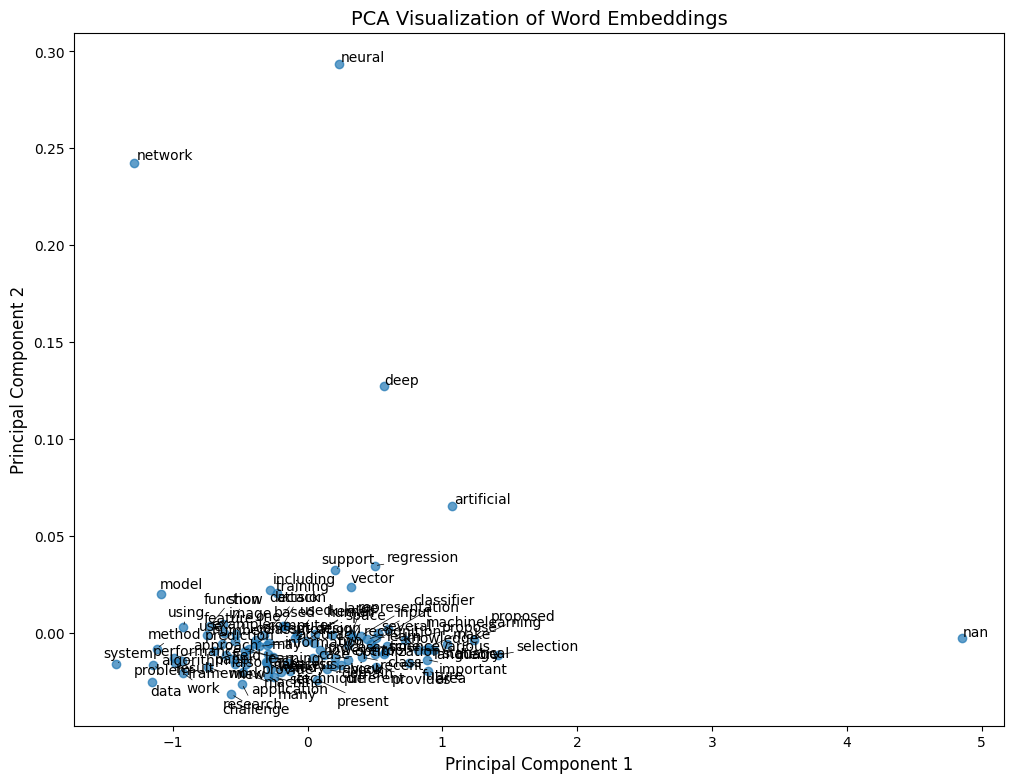

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


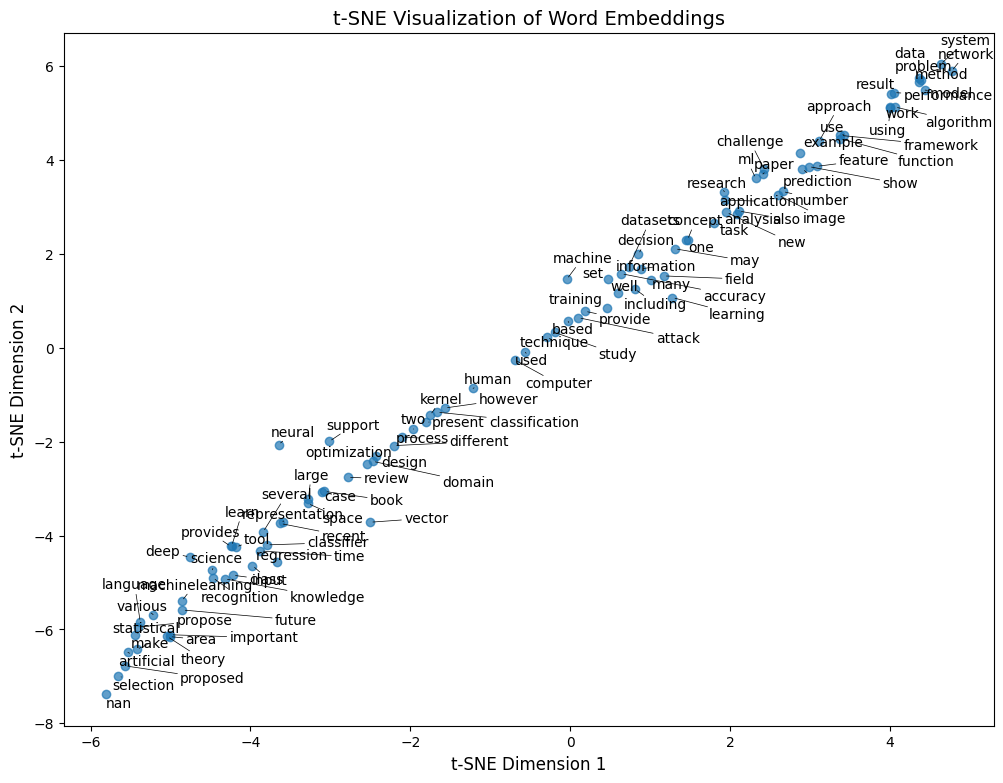

In [19]:
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from scipy.spatial.distance import cosine
import adjustText  # Import adjustText for better annotation placement

# Load preprocessed data from CSV
file_path = '/content/papers_lemmatized.csv'
df = pd.read_csv(file_path)

# Assuming the abstract column is named 'abstract' and contains tokenized sentences
# Rename the 'abstract' column to 'text' if necessary for consistency
df.rename(columns={'abstract': 'text'}, inplace=True)

df['text'] = df['text'].apply(lambda x: str(x).split())  # Convert string tokens to lists
sentences = df['text'].tolist()

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=2, workers=4)

# Save the model
model.save("word2vec.model")

# Get word vectors
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors[:100])  # Visualizing only top 100 words
plt.figure(figsize=(12, 9))  # Increased figure size
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)

# Improved annotation placement using adjustText
texts = []
for i, word in enumerate(words[:100]):
    texts.append(plt.text(pca_result[i, 0], pca_result[i, 1], word, fontsize=10))  # Increased font size
adjustText.adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))  # Added arrowprops for clarity

plt.title("PCA Visualization of Word Embeddings", fontsize=14)  # Increased title font size
plt.xlabel("Principal Component 1", fontsize=12)  # Added axis labels
plt.ylabel("Principal Component 2", fontsize=12)
plt.show()

# t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)
tsne_result = tsne.fit_transform(vectors[:100])
plt.figure(figsize=(12, 9))  # Increased figure size
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7)

# Improved annotation placement using adjustText
texts = []
for i, word in enumerate(words[:100]):
    texts.append(plt.text(tsne_result[i, 0], tsne_result[i, 1], word, fontsize=10))  # Increased font size
adjustText.adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))  # Added arrowprops for clarity

plt.title("t-SNE Visualization of Word Embeddings", fontsize=14)  # Increased title font size
plt.xlabel("t-SNE Dimension 1", fontsize=12)  # Added axis labels
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [20]:
# The GitHub link of your final csv file

# Load the dataset

# Link:



Annotated dataset saved as annotated_reviews.csv


If I were to choose a Natural Language Processing (NLP) task for a dataset, I would likely lean toward Text Classification. It's a versatile and widely applicable task in NLP that can be used for a variety of purposes such as spam detection, topic categorization, and even sentiment analysis.

Task Chosen: Text Classification
For this task, let's say the dataset consists of product reviews, and the goal is to classify the reviews into predefined categories (e.g., sentiment categories like positive, negative, or neutral).

I'm using abstract as the data set mostly abstract contain about the information of the paper and i used no of doucments in document id as 1 column and abstract in another column and sentiment as another column and the column contain the positive, negative and neutral

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

It was a bit interesting and this was interesting while doing pos and writing sentiments